In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Loading Data

In [ ]:
property_dfs = []

dir_path = '/content/drive/MyDrive/property_data'

for path in os.listdir(dir_path):
    property_dfs.append(pd.read_csv(os.path.join(dir_path, path), low_memory=False))

property_data_2025 = pd.concat(property_dfs, ignore_index=True)

property_data_2025 = property_data_2025[(property_data_2025['PropertyType'] == 'Residential') & (property_data_2025['PropertySubType'] == 'SingleFamilyResidence')]

In [ ]:
lower_bound_close_price = property_data_2025['ClosePrice'].quantile(.005)
upper_bound_close_price = property_data_2025['ClosePrice'].quantile(.995)

property_data_2025 = property_data_2025[(property_data_2025['ClosePrice'] > lower_bound_close_price) & (property_data_2025['ClosePrice'] < upper_bound_close_price)]

In [ ]:
initial_rows = len(property_data_2025)

property_data_2025.dropna(subset=['ClosePrice'], inplace=True)
property_data_2025['CloseDate'] = pd.to_datetime(property_data_2025['CloseDate'])
property_data_2025.drop_duplicates(inplace=True)

valid_data_mask = (
    (property_data_2025['ClosePrice'] > 0) &             # Price must be positive
    (property_data_2025['LivingArea'] > 100) &           # Living area should be realistic (>100 sqft)
    (property_data_2025['BedroomsTotal'] > 0) &          # At least 1 bedroom for Residential
    (property_data_2025['BathroomsTotalInteger'] > 0)    # Must have a bathroom
)

property_data_2025 = property_data_2025[valid_data_mask].copy()
rows_removed = initial_rows - len(property_data_2025)

print(f"Cleaning Complete.")
print(f"Rows removed due to logic errors: {rows_removed}")
print(f"Remaining clean records: {len(property_data_2025)}")

Cleaning Complete.
Rows removed due to logic errors: 185
Remaining clean records: 128720


In [ ]:
columns_to_keep = [
    'ClosePrice', 'BuyerAgentAOR', 'ListAgentAOR', 'Flooring', 'ViewYN', 'WaterfrontYN', 'BasementYN',
    'PoolPrivateYN','OriginalListPrice', 'ListingKey', 'LivingArea', 'ListPrice', 'DaysOnMarket',
    'BuyerOfficeName', 'CoListOfficeName', 'ListAgentFullName', 'FireplacesTotal', 'AssociationFeeFrequency',
    'AssociationFee', 'AboveGradeFinishedArea', 'ListingKeyNumeric', 'MLSAreaMajor', 'TaxAnnualAmount',
    'AttachedGarageYN', 'ParkingTotal', 'BuilderName', 'YearBuilt', 'ListingId', 'City', 'TaxYear', 'NewConstructionYN',
    'BuildingAreaTotal', 'BedroomsTotal', 'BelowGradeFinishedArea', 'Stories', 'MainLevelBedrooms',
    'PostalCode', 'LotSizeSquareFeet'
]
property_data_2025 = property_data_2025[columns_to_keep]

In [ ]:
property_data_2025.head()

,ClosePrice,BuyerAgentAOR,ListAgentAOR,Flooring,ViewYN,WaterfrontYN,BasementYN,PoolPrivateYN,OriginalListPrice,ListingKey,...,City,TaxYear,NewConstructionYN,BuildingAreaTotal,BedroomsTotal,BelowGradeFinishedArea,Stories,MainLevelBedrooms,PostalCode,LotSizeSquareFeet
0,1250000.0,OrangeCounty,OrangeCounty,"Carpet,Tile",False,NaN,NaN,False,1250000.0,1147233684,...,Huntington Beach,NaN,False,NaN,3.0,NaN,1.0,3.0,92646,5913.0
1,2299995.0,Mlslistings,Mlslistings,Carpet,False,NaN,NaN,NaN,NaN,1147228247,...,San Jose,NaN,False,NaN,3.0,NaN,NaN,NaN,95124,18432.0
2,810000.0,PacificSouthwest,PacificSouthwest,NaN,False,NaN,NaN,False,799900.0,1147223143,...,San Ysidro,NaN,NaN,NaN,4.0,NaN,2.0,0.0,92173,5300.0
3,925000.0,PacificSouthwest,PacificSouthwest,NaN,False,NaN,NaN,False,925000.0,1147209231,...,San Diego,NaN,NaN,NaN,5.0,NaN,2.0,1.0,92154,5272.0
4,1300000.0,NorthSanLuisObispo,NorthSanLuisObispo,NaN,False,NaN,NaN,False,1300000.0,1147200364,...,Templeton,NaN,False,NaN,3.0,NaN,1.0,3.0,93465,10500.0


# Distribution Plots

<Axes: ylabel='Density'>

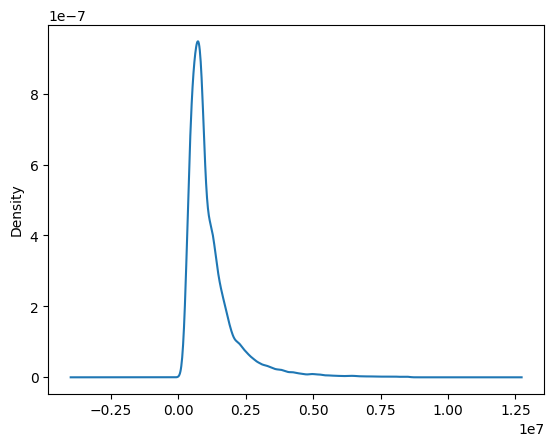

In [ ]:
property_data_2025['ClosePrice'].plot.kde()

<Axes: ylabel='Density'>

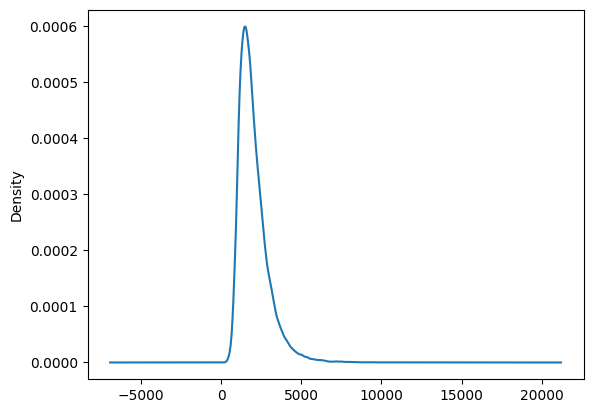

In [ ]:
property_data_2025['LivingArea'].plot.kde()

<Axes: ylabel='Density'>

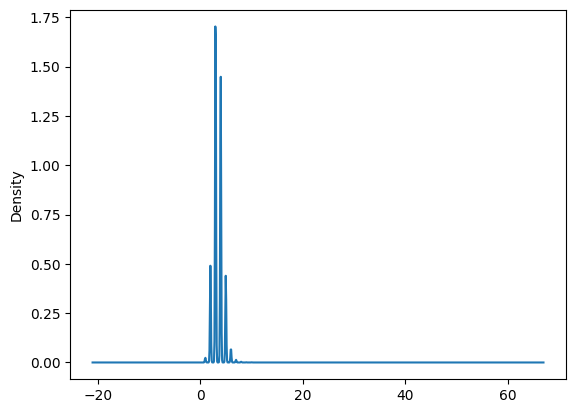

In [ ]:
property_data_2025['BedroomsTotal'].plot.kde()

# Correlation Heatmap

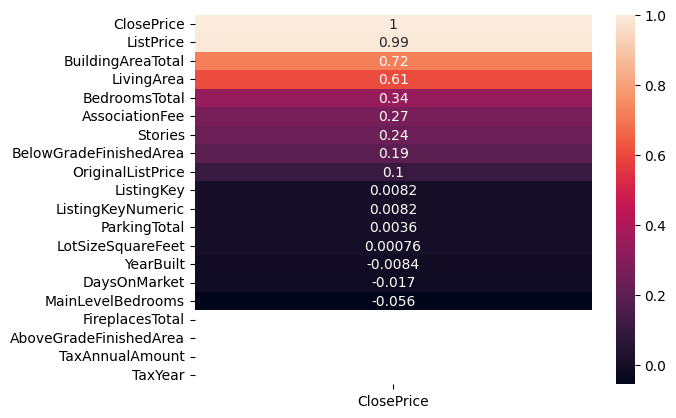

In [ ]:
corr_matrix = property_data_2025.corr(numeric_only=True)['ClosePrice'].sort_values(ascending=False).to_frame()
sns.heatmap(corr_matrix, annot=True)
plt.show()

# Column Information

In [ ]:
property_data_2025.info()

<class 'pandas.core.frame.DataFrame'>
Index: 128720 entries, 0 to 260100
Data columns (total 38 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   ClosePrice               128720 non-null  float64
 1   BuyerAgentAOR            128704 non-null  object 
 2   ListAgentAOR             128704 non-null  object 
 3   Flooring                 83177 non-null   object 
 4   ViewYN                   116910 non-null  object 
 5   WaterfrontYN             64 non-null      object 
 6   BasementYN               3039 non-null    object 
 7   PoolPrivateYN            118660 non-null  object 
 8   OriginalListPrice        128467 non-null  float64
 9   ListingKey               128720 non-null  int64  
 10  LivingArea               128720 non-null  float64
 11  ListPrice                128720 non-null  float64
 12  DaysOnMarket             128720 non-null  int64  
 13  BuyerOfficeName          127117 non-null  object 
 14  CoListOff

In [ ]:
property_data_2025.describe()

,ClosePrice,OriginalListPrice,ListingKey,LivingArea,ListPrice,DaysOnMarket,FireplacesTotal,AssociationFee,AboveGradeFinishedArea,ListingKeyNumeric,TaxAnnualAmount,ParkingTotal,YearBuilt,TaxYear,BuildingAreaTotal,BedroomsTotal,BelowGradeFinishedArea,Stories,MainLevelBedrooms,LotSizeSquareFeet
count,1.287200e+05,1.284670e+05,1.287200e+05,128720.000000,1.287200e+05,128720.000000,0.0,91168.000000,0.0,1.287200e+05,0.0,128719.000000,128662.000000,0.0,8317.000000,128720.000000,880.000000,114945.000000,78391.000000,1.264900e+05
mean,1.193936e+06,1.331003e+06,1.113514e+09,2023.003398,1.195679e+06,38.777214,NaN,100.881087,NaN,1.113514e+09,NaN,3.108045,1975.677162,NaN,2307.268967,3.484268,60.247727,1.350463,2.278195,3.184167e+05
std,9.637713e+05,9.260191e+06,1.541367e+07,944.196578,9.857461e+05,49.740885,NaN,292.595894,NaN,1.541367e+07,NaN,53.103639,27.519958,NaN,1218.411149,0.951827,269.563495,0.477117,2.133750,1.555399e+07
min,1.900000e+05,0.000000e+00,4.257958e+08,105.000000,5.200000e+04,-265.000000,NaN,0.000000,NaN,4.257958e+08,NaN,-143.000000,1776.000000,NaN,352.000000,1.000000,0.000000,1.000000,0.000000,0.000000e+00
25%,6.270000e+05,6.398350e+05,1.104384e+09,1385.000000,6.288880e+05,8.000000,NaN,0.000000,NaN,1.104384e+09,NaN,2.000000,1956.000000,NaN,1475.000000,3.000000,0.000000,1.000000,1.000000,5.663000e+03
50%,8.889435e+05,8.990000e+05,1.112242e+09,1811.000000,8.900000e+05,20.000000,NaN,0.000000,NaN,1.112242e+09,NaN,2.000000,1976.000000,NaN,1997.000000,3.000000,0.000000,1.000000,3.000000,7.260000e+03
75%,1.400000e+06,1.410000e+06,1.119667e+09,2421.000000,1.399000e+06,51.000000,NaN,130.000000,NaN,1.119667e+09,NaN,3.000000,1998.000000,NaN,2800.000000,4.000000,0.000000,2.000000,3.000000,1.037900e+04
max,8.550000e+06,1.390000e+09,1.150042e+09,14168.000000,1.795000e+07,894.000000,NaN,14129.000000,NaN,1.150042e+09,NaN,15720.000000,2026.000000,NaN,12124.000000,45.000000,3437.000000,2.000000,444.000000,2.087221e+09


# Missing Data

In [ ]:
property_data_2025.isnull().sum()

,0
ClosePrice,0
BuyerAgentAOR,16
ListAgentAOR,16
Flooring,45543
ViewYN,11810
WaterfrontYN,128656
BasementYN,125681
PoolPrivateYN,10060
OriginalListPrice,253
ListingKey,0


# Categorical Variables

In [ ]:
for col in property_data_2025[list(set(property_data_2025.columns) - set(property_data_2025._get_numeric_data().columns))].columns:
  print(f'{col}: {len(property_data_2025[col].unique())}')

WaterfrontYN: 2
AssociationFeeFrequency: 5
PoolPrivateYN: 3
ListingId: 128635
AttachedGarageYN: 3
CoListOfficeName: 3205
Flooring: 267
MLSAreaMajor: 1020
BuyerOfficeName: 12467
ListAgentAOR: 54
PostalCode: 2082
ViewYN: 3
BasementYN: 2
NewConstructionYN: 3
ListAgentFullName: 44347
BuilderName: 1392
BuyerAgentAOR: 54
City: 967


In [ ]:
X = property_data_2025[['LivingArea', 'BedroomsTotal', 'LotSizeSquareFeet', 'BuildingAreaTotal']] # Features
y = property_data_2025['ListPrice'] # Target variable

# Split the data with an 80% train and 20% test ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)